In [2]:
pip install -r requirement.txt

Defaulting to user installation because normal site-packages is not writeable
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached ml_dtypes-0.5.1-cp311-cp311-win_amd64.whl.metadata (22 kB)
  Using cached numpy-2.2.5-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached pyOpenSSL-25.0.0-py3-none-any.whl.metadata (16 kB)
  Using cached Scrapy-2.12.0-py2.py3-none-any.whl.metadata (5.3 kB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.2 MB 

Reason for being yanked: https://github.com/pypa/setuptools/issues/4976
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.8.7 requires thinc<8.4.0,>=8.3.4, but you have thinc 9.1.1 which is incompatible.
tensorflow-intel 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.1 which is incompatible.
tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.


In [3]:
import torch
from torchvision.transforms import v2
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

In [4]:
### 1. Image Dataset Extraction and Preprocessing

## 1.1 Getting training and testing dataset directory
## 1.2 Function of extracting dataset images
## 1.3 Extracting dataset images
## 1.4 Image size and total image count
## 1.5 Function of label count for 1.7
## 1.6 Function of graph plot for 1.7
## 1.7 Dataset and label distribution graph
## 1.8 Showcase first image of train and testing dataset
## 1.9 Function of extracting first n images of all emotions for 1.10
## 1.10 Showcase grid of example images of all emotion labels

## 1.11 Showcase of conversion of greyscale images to RGB images (For architecture purposes)
## 1.12 Showcase of resizing of image to 224 x 244 pixels (For architecture purposes)

## 1.11 Function for detecting faces using Haar Cascade Classifier for 1.12
## 1.12 Showcase detected face comparison with original image 
## 1.13 Function to crop detected face and scale to 48x48 pixels for 1.14
## 1.14 Showcase comparison between original image and cropped detected face image
## 1.15 Showcase of comparisons between original image and randomly horizontal fliped image
## 1.16 Showcase of comparisons between original image and randomly cropped image up to 10%
## 1.17 Showcase of comparisons between original image and scalling image between 80% to 120% and rotating betweeen -25 to 25
## 1.18 Showcase of comparisons between original image and brightness adjusted image
## 1.19 Showcase of comparisons between original image and contrast adjusted image
## 1.20 Showcase 10 Transformed Image With Combination of All Transformation 
## 1.21 Whole Function for Entire Preprocessing Step
## 1.22 Testing for Whole Preprocess Image for The Dataset
## 1.23 Testing for image saving mechanism
## 1.24 Preprocess and Save Images into Dataset as Tensor

In [5]:
## 1.1 Getting training and testing dataset directory

current_wd = os.getcwd()

train_directory = os.path.join(current_wd, "raw_data", "train")

test_directory = os.path.join(current_wd, "raw_data", "test")

print(train_directory)
print(test_directory)

c:\Users\user\Documents\XIAMEN\Github Code Space\DL-Assignment\raw_data\train
c:\Users\user\Documents\XIAMEN\Github Code Space\DL-Assignment\raw_data\test


In [6]:
## 1.2 Function of extracting dataset images

def datasetLoader(root):
    imgPaths = []
    labels = []

    for label in os.listdir(root):
        emotionDir = os.path.join(root, label)
        for filename in os.listdir(emotionDir):
            imgPath = os.path.join(root, label, filename)
            imgPaths.append(imgPath)
            labels.append(label)
        
        print(f"Faces of '{label}' extraction completed.")
    
    return imgPaths, labels

In [7]:
## 1.3.1 Extracting dataset images (training)

train_img, train_label = datasetLoader(train_directory)

print("\n", train_img[:5], "\n")
print(train_label[:5])

Faces of 'angry' extraction completed.
Faces of 'disgust' extraction completed.
Faces of 'fear' extraction completed.
Faces of 'happy' extraction completed.
Faces of 'neutral' extraction completed.
Faces of 'sad' extraction completed.
Faces of 'surprise' extraction completed.

 ['c:\\Users\\user\\Documents\\XIAMEN\\Github Code Space\\DL-Assignment\\raw_data\\train\\angry\\Training_10118481.jpg', 'c:\\Users\\user\\Documents\\XIAMEN\\Github Code Space\\DL-Assignment\\raw_data\\train\\angry\\Training_10120469.jpg', 'c:\\Users\\user\\Documents\\XIAMEN\\Github Code Space\\DL-Assignment\\raw_data\\train\\angry\\Training_10131352.jpg', 'c:\\Users\\user\\Documents\\XIAMEN\\Github Code Space\\DL-Assignment\\raw_data\\train\\angry\\Training_10161559.jpg', 'c:\\Users\\user\\Documents\\XIAMEN\\Github Code Space\\DL-Assignment\\raw_data\\train\\angry\\Training_1021836.jpg'] 

['angry', 'angry', 'angry', 'angry', 'angry']


In [8]:
## 1.3.2 Extracting dataset images (testing)

test_img, test_label = datasetLoader(test_directory)

print("\n", test_img[:5], "\n")
print(train_label[:5])

Faces of 'angry' extraction completed.
Faces of 'disgust' extraction completed.
Faces of 'fear' extraction completed.
Faces of 'happy' extraction completed.
Faces of 'neutral' extraction completed.
Faces of 'sad' extraction completed.
Faces of 'surprise' extraction completed.

 ['c:\\Users\\user\\Documents\\XIAMEN\\Github Code Space\\DL-Assignment\\raw_data\\test\\angry\\PrivateTest_10131363.jpg', 'c:\\Users\\user\\Documents\\XIAMEN\\Github Code Space\\DL-Assignment\\raw_data\\test\\angry\\PrivateTest_10304478.jpg', 'c:\\Users\\user\\Documents\\XIAMEN\\Github Code Space\\DL-Assignment\\raw_data\\test\\angry\\PrivateTest_1054527.jpg', 'c:\\Users\\user\\Documents\\XIAMEN\\Github Code Space\\DL-Assignment\\raw_data\\test\\angry\\PrivateTest_10590091.jpg', 'c:\\Users\\user\\Documents\\XIAMEN\\Github Code Space\\DL-Assignment\\raw_data\\test\\angry\\PrivateTest_1109992.jpg'] 

['angry', 'angry', 'angry', 'angry', 'angry']


In [9]:
## 1.4 Image size and total image count

filepath = test_img[0]

img = cv2.imread(filepath)

width = img.shape[1]
height = img.shape[0]

totalImg = 0
totalImg += len(train_img)
totalImg += len(test_img)

print(f"The height of a single image is: {height} pixels")
print(f"The width of a single image is {width} pixels")
print(f"Number of pixels per image: {width*height}\n")

print(f"The total number of train images are {len(train_img)}")
print(f"The total number of test images are {len(test_img)}")
print(f"The total number of images are {totalImg}")

The height of a single image is: 48 pixels
The width of a single image is 48 pixels
Number of pixels per image: 2304

The total number of train images are 28709
The total number of test images are 7178
The total number of images are 35887


In [10]:
## 1.5 Function of label count for 1.7

def labelsCountAndName(label_list):
    name_list = []
    num_list = [0, 0, 0, 0, 0, 0, 0]
    progressPointer = -1

    for label in label_list:
        
        if label not in name_list:
            name_list.append(label)
            progressPointer += 1

        num_list[progressPointer] += 1
    
    return name_list, num_list

In [11]:
## 1.6 Function of graph plot for 1.7

def plotDistributionBarGraph(name_list, num_list, graphTitle):
    plt.bar(name_list, num_list)
    plt.title(graphTitle)
    plt.xlabel("Emotions")
    plt.ylabel("Number of Pictures")
    plt.show()

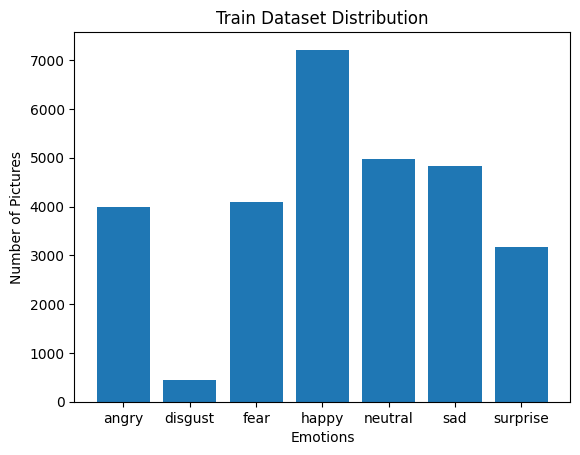

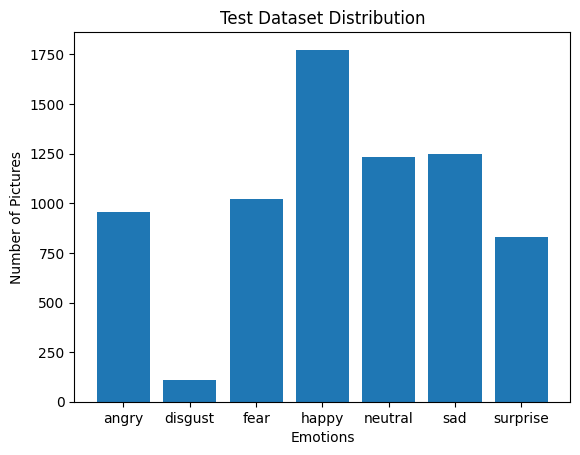

In [12]:
## 1.7 Dataset and label distribution graph

train_nameList, train_numList = labelsCountAndName(train_label)
test_nameList, test_numList = labelsCountAndName(test_label)

plotDistributionBarGraph(train_nameList, train_numList, "Train Dataset Distribution")
plotDistributionBarGraph(test_nameList, test_numList, "Test Dataset Distribution")

<function matplotlib.pyplot.show(close=None, block=None)>

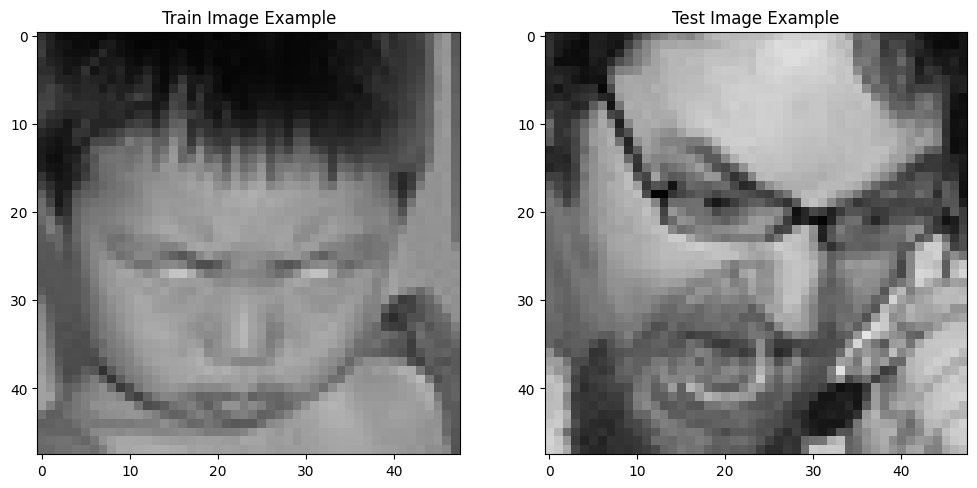

In [13]:
## 1.8 Showcase first image of train and testing dataset

fig = plt.figure(figsize=(12, 7))

trainImgAddress = train_img[0]
testImgAddress = test_img[0]

trainImgData = cv2.imread(trainImgAddress)
testImgData = cv2.imread(testImgAddress)

plt.subplot(1, 2, 1)
plt.imshow(trainImgData, cmap="gray")
plt.title("Train Image Example")

plt.subplot(1, 2, 2)
plt.imshow(testImgData, cmap="gray")
plt.title("Test Image Example")

plt.show

In [14]:
## 1.9 Function of extracting first n images of all emotions for 1.10

def getImagePathAndLabels(numPicPerEmotion):
    picAdd = []
    picLabel = []

    for emotion in train_nameList:
        trainWD = os.path.join(train_directory, emotion)
        testWD = os.path.join(test_directory, emotion)

        numCheck = 0

        for trainImgName in os.listdir(trainWD):
            
            trainImgPath = os.path.join(trainWD, trainImgName)

            picAdd.append(trainImgPath)
            picLabel.append(emotion)
            numCheck += 1
            if numCheck == numPicPerEmotion:
                break
        
        numCheck = 0

        for testImgName in os.listdir(testWD):
            
            testImgPath = os.path.join(testWD, testImgName)

            picAdd.append(testImgPath)
            picLabel.append(emotion)
            numCheck += 1
            if numCheck == numPicPerEmotion:
                break
        
    return picAdd, picLabel


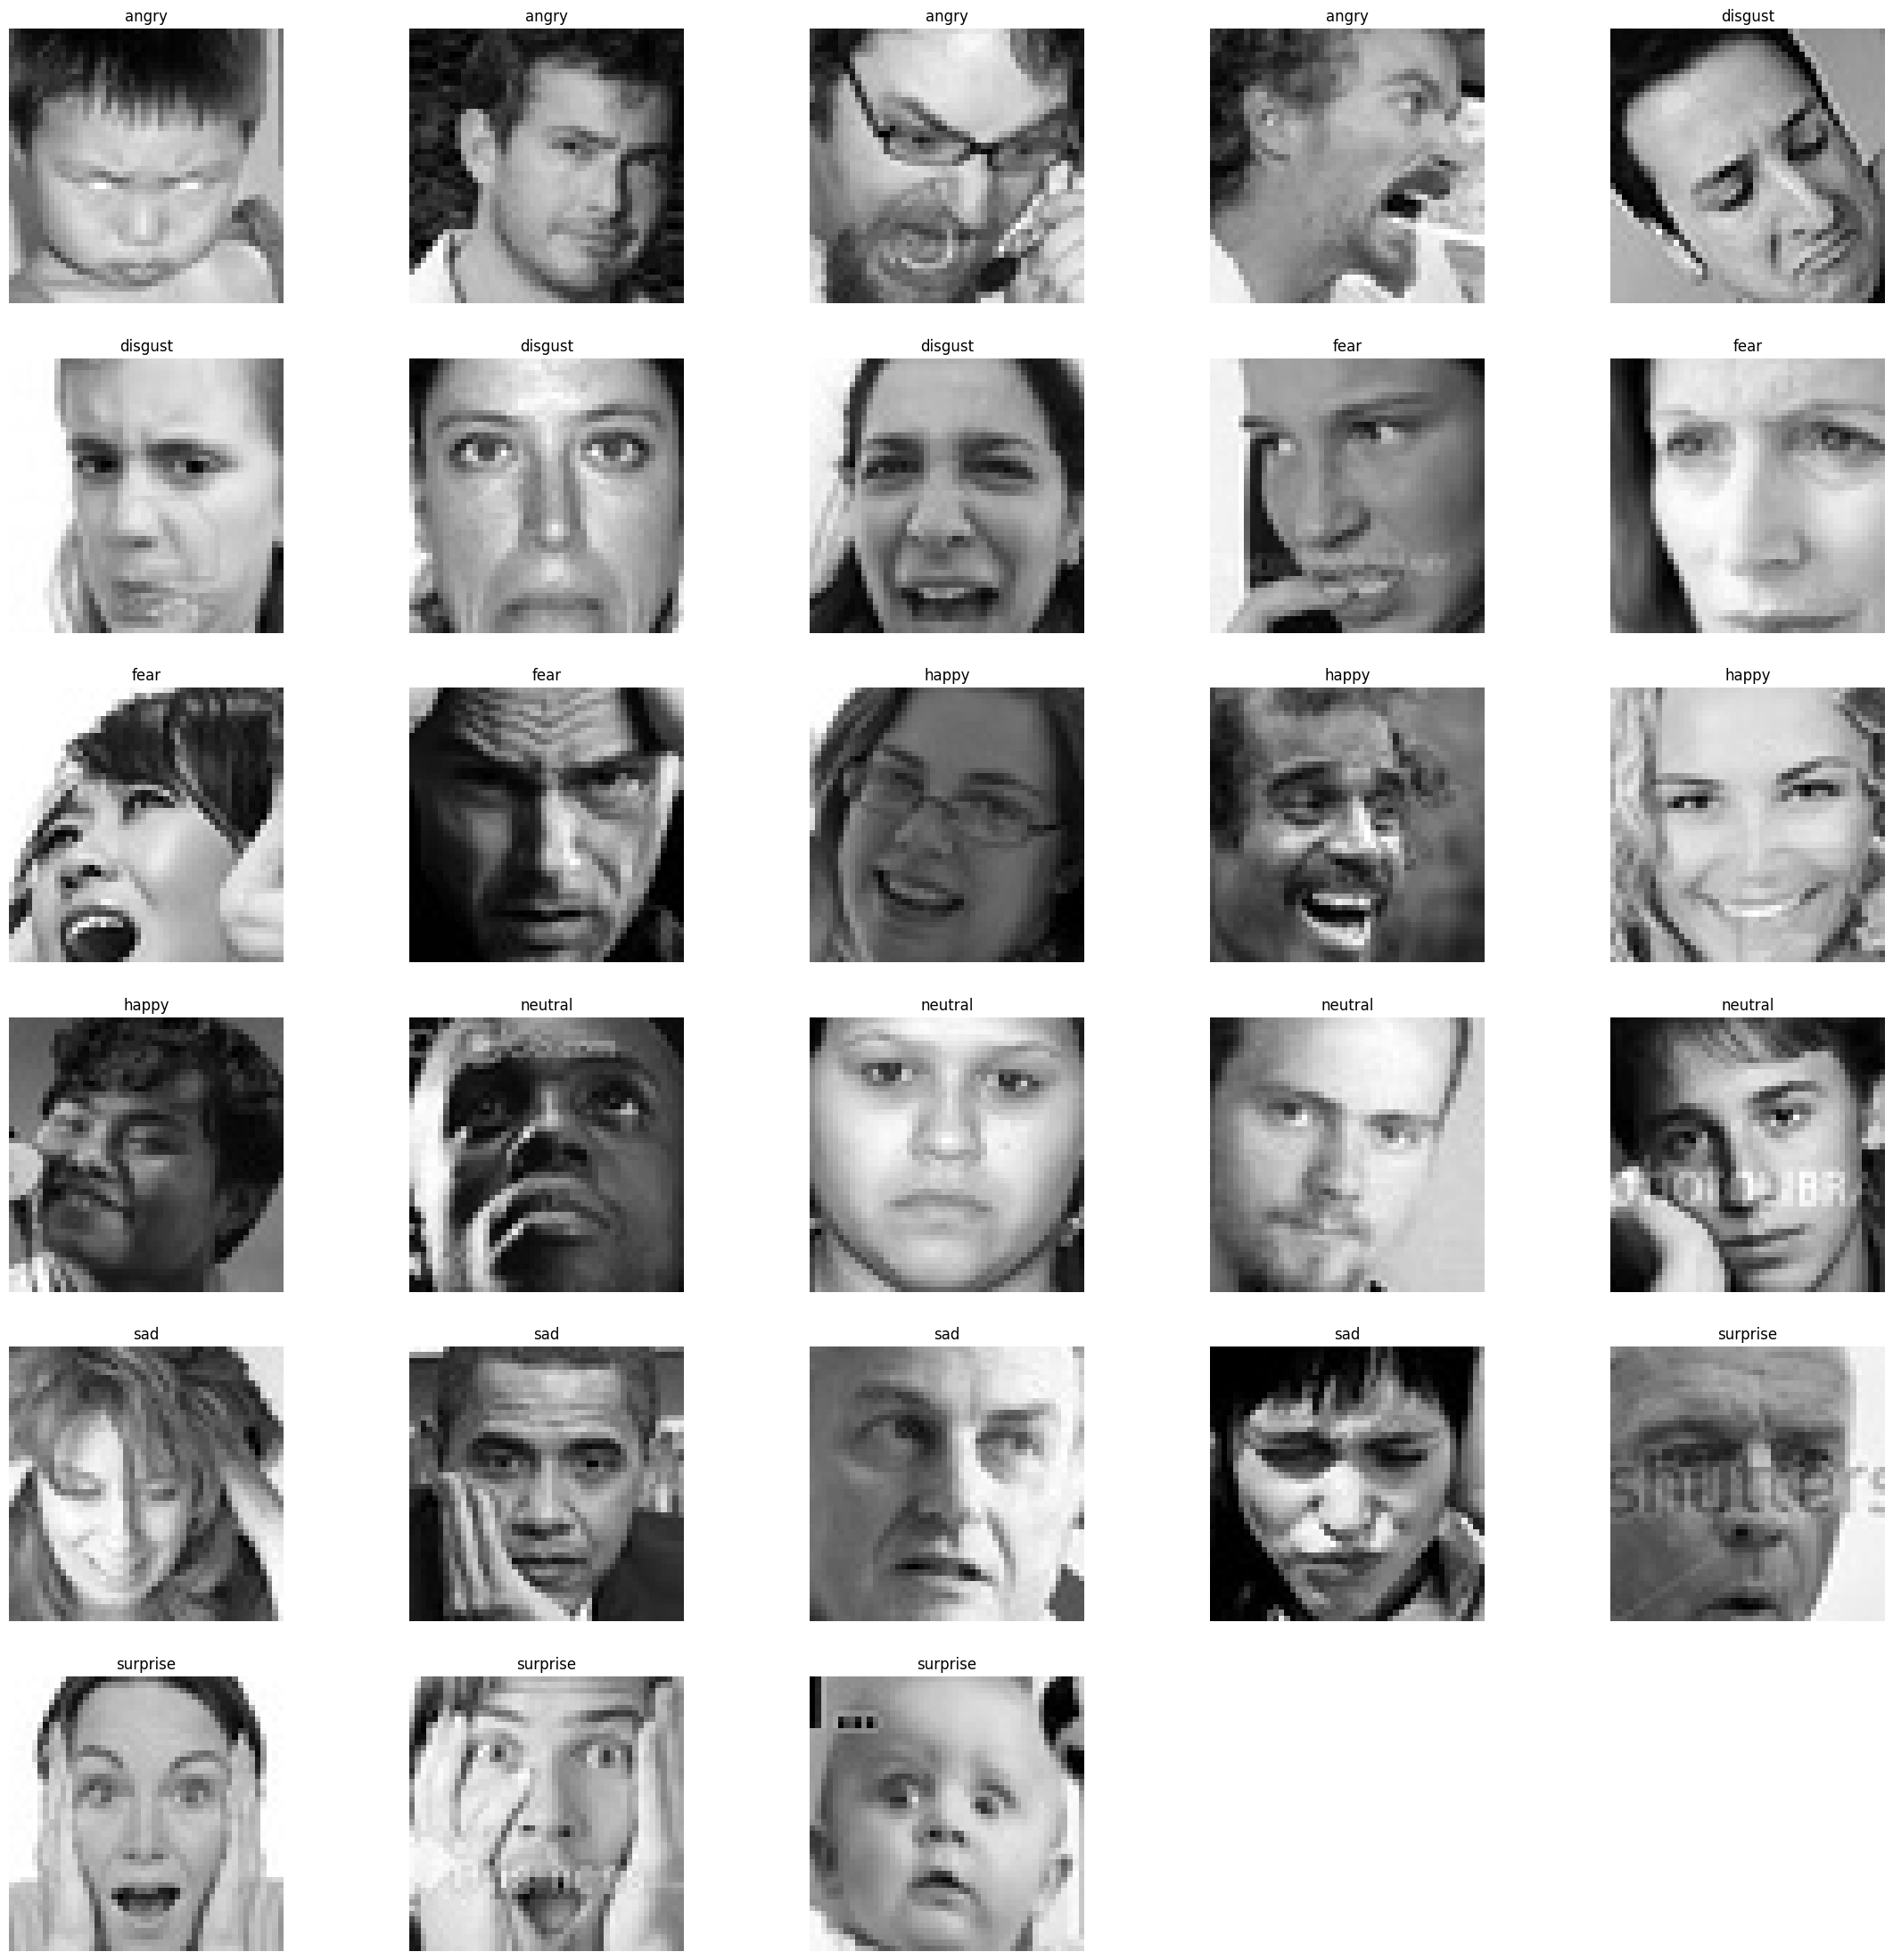

In [15]:
## 1.10 Showcase grid of example images of all emotion labels

import math

numPicPerEmotion = 2

plotSize = numPicPerEmotion * 7 * 2

subplotSize = math.ceil(plotSize / 5)

fig = plt.figure(figsize=(plotSize, plotSize))

picAdd, picLabel = getImagePathAndLabels(numPicPerEmotion)

for i in range(0, plotSize):
    plt.subplot(subplotSize, 5, i+1)
    img = plt.imread(picAdd[i])

    plt.imshow(img, cmap="gray")
    plt.title(picLabel[i])
    plt.axis('off')

plt.show()

Shape of greyscale image: (48, 48)
Shape of color image: (48, 48, 3)


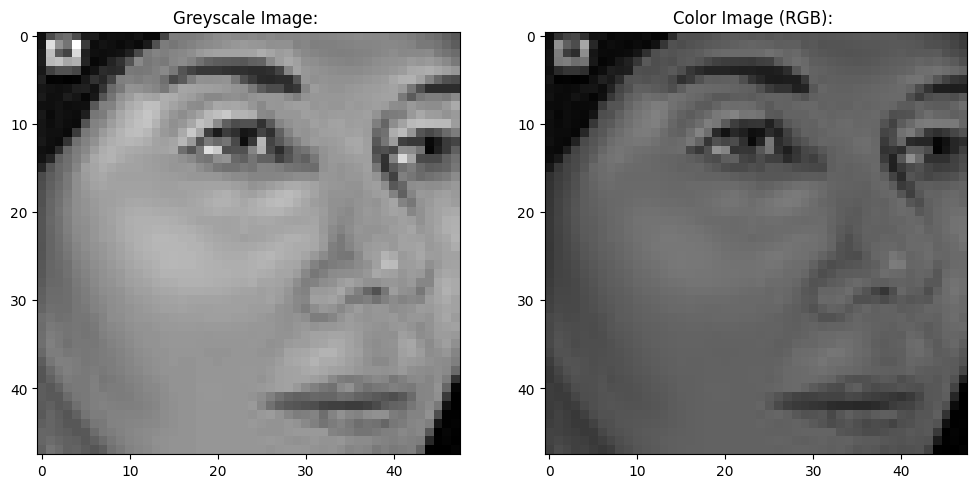

In [23]:
## 1.11 Showcase of conversion of greyscale images to RGB images (For architecture purposes)

import random

luckyNumber = random.randrange(0, len(train_img))

greyImg = cv2.imread(train_img[luckyNumber], cv2.IMREAD_GRAYSCALE)

colorImg = cv2.cvtColor(greyImg, cv2.COLOR_GRAY2RGB)

print(f"Shape of greyscale image: {greyImg.shape}")
print(f"Shape of color image: {colorImg.shape}")

# Additional 2 more channels in the image data which represents the RGB channels

fig = plt.figure(figsize=(12,7))

plt.subplot(1, 2, 1)
plt.imshow(greyImg, cmap="grey")
plt.title("Greyscale Image: ")

plt.subplot(1, 2, 2)
plt.imshow(colorImg)
plt.title("Color Image (RGB): ")

plt.show()

# No color difference due to it originally being greyscale


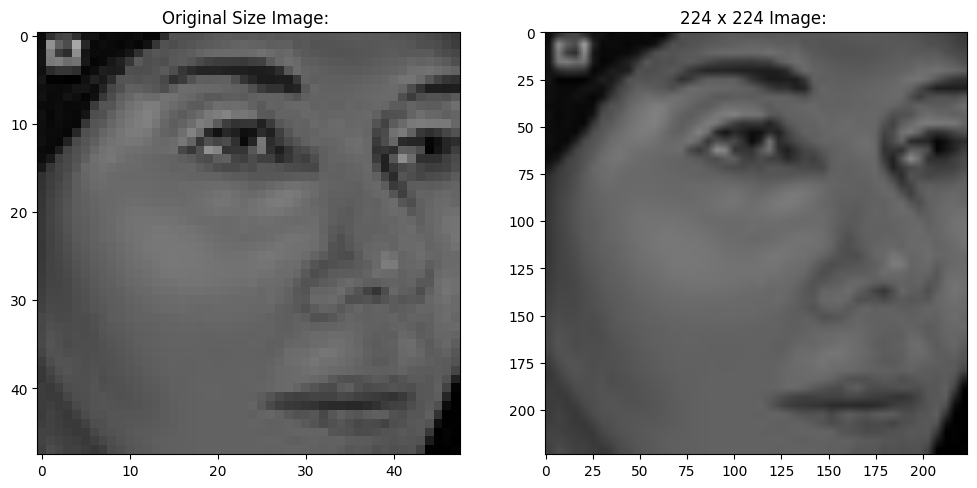

In [36]:
## 1.12 Showcase of resizing of image to 224 x 244 pixels (For architecture purposes)

testImg = cv2.imread(train_img[luckyNumber], cv2.IMREAD_COLOR_RGB)

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.Resize((224, 224)),
])

biggerImg = transform(testImg)

fig = plt.figure(figsize=(12,7))

plt.subplot(1, 2, 1)
plt.imshow(testImg)
plt.title("Original Size Image: ")

plt.subplot(1, 2, 2)
plt.imshow(biggerImg.permute(1, 2, 0)) # Reorders the image data from (C x H x W) to (H x W x C)
plt.title("224 x 224 Image: ")

plt.show()

In [ ]:
## 1.11 Function for detecting faces using Haar Cascade Classifier for 1.12

cascadeXMLPath = os.path.join(current_wd, "haarcascade_frontalface_default.xml")

face_cascade = cv2.CascadeClassifier(cascadeXMLPath)

def adjustedFaceDetection(img):
    face_img = img.copy()

    face_rectangle = face_cascade.detectMultiScale(face_img,
                                                   scaleFactor=1.1, # Image size reduced by 1.1 
                                                   minNeighbors=5) # Amount of detections around the same region to declare it is an object

    for (x, y, w, h) in face_rectangle: # x_coord, y_coord, width, height
        cv2.rectangle(face_img, (x, y), (x+w, y+h), (255, 255, 255), 1) # Draw rectangle over detected face

        # (x, y) --> bottom left corner coordinates
        # (x+w, y+h) --> upper right corner coordinates after adding image width and height
        # (255, 255, 255) --> Image color in (R,G,B) which is black color
        # 10 --> Line thickness of 10 pixels

    return face_img

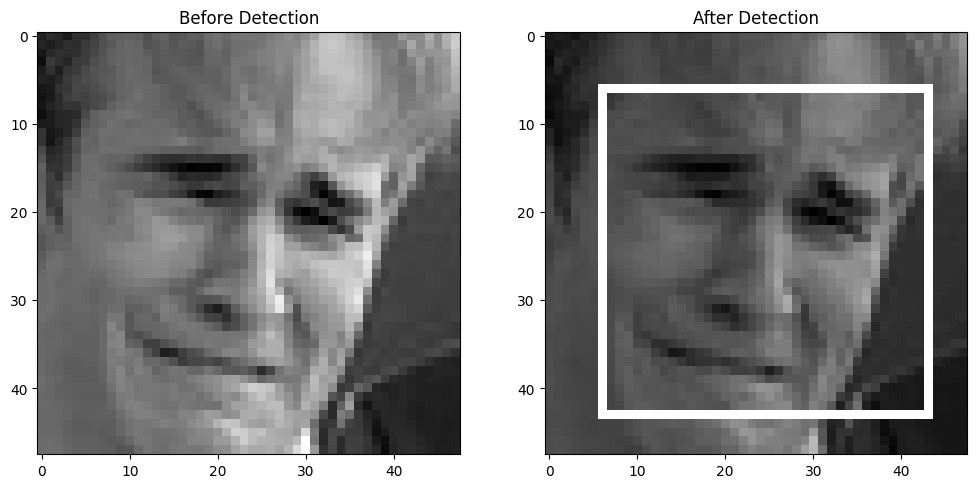

In [ ]:
## 1.12 Showcase detected face comparison with original image 

imgData = plt.imread(train_img[luckyNumber])

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(imgData, cmap='grey')
plt.title("Before Detection")

detectedImgData = adjustedFaceDetection(imgData)

plt.subplot(1, 2, 2)
plt.imshow(detectedImgData, cmap="grey")
plt.title("After Detection")

plt.show()

In [ ]:
## 1.13 Function to crop detected face and scale to 48x48 pixels for 1.14

cascadeXMLPath = os.path.join(current_wd, "haarcascade_frontalface_default.xml")

face_cascade = cv2.CascadeClassifier(cascadeXMLPath)


def cropImageOfDetectedFace(img):

    face_rectangle = face_cascade.detectMultiScale(img,
                                                   scaleFactor=1.1, # Image size reduced by 1.1 
                                                   minNeighbors=5) # Amount of detections around the same region to declare it is an object


    for (x, y, w, h) in face_rectangle:

        croppedImg = img[y+1 : y+h, x+1: x+w]

        resizedCroppedImg = cv2.resize(croppedImg, dsize=(224, 224))

        return resizedCroppedImg
    
    return img

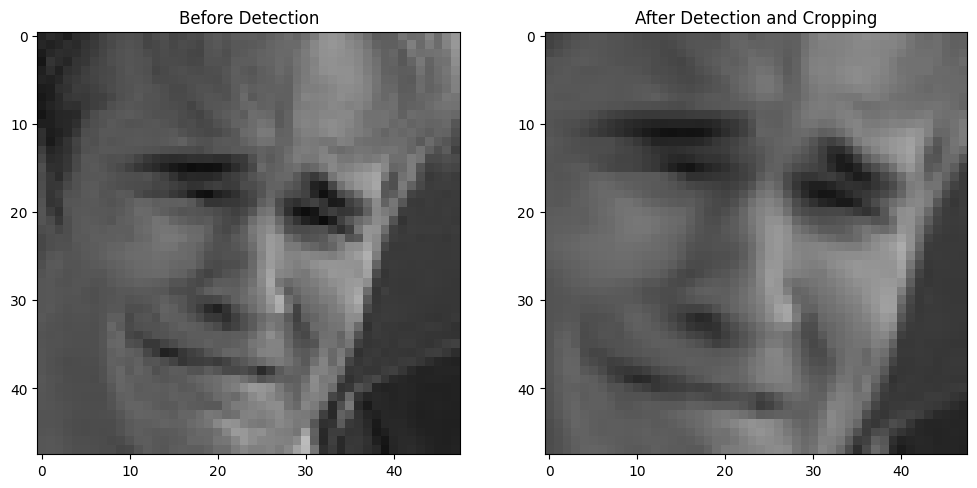

In [ ]:
## 1.14 Showcase comparison between original image and cropped detected face image

imgData = cv2.imread(train_img[luckyNumber])

resizedCroppedImg = cropImageOfDetectedFace(imgData)

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(imgData, cmap='grey')
plt.title("Before Detection")

plt.subplot(1, 2, 2)
plt.imshow(resizedCroppedImg, cmap="grey")
plt.title("After Detection and Cropping")

plt.show()

Text(0.5, 1.0, 'After Flipping')

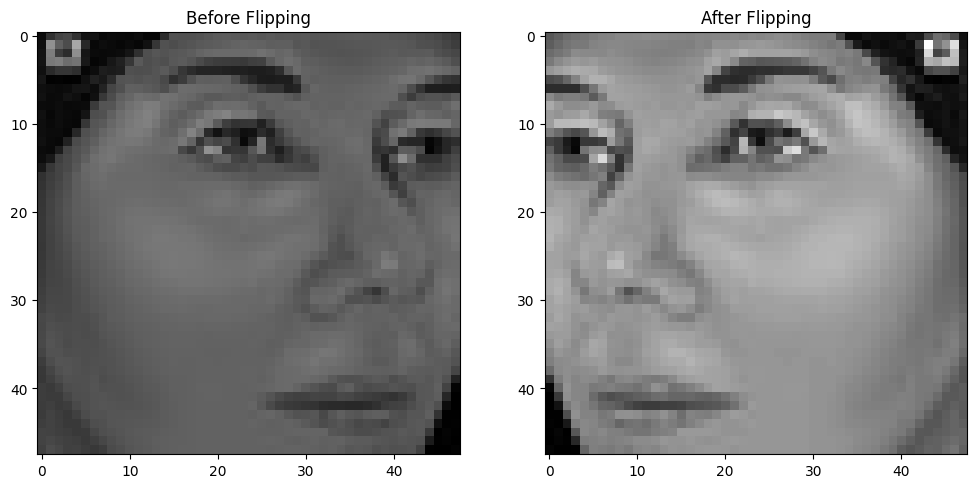

In [26]:
## 1.15 Showcase of comparisons between original image and randomly horizontal fliped image

img = cv2.imread(train_img[luckyNumber])

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomHorizontalFlip(p=1), # 100% chance to flip an image
])

transformedImg = transform(img)

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='grey')
plt.title("Before Flipping")

plt.subplot(1, 2, 2)
plt.imshow(transformedImg.numpy()[0], cmap="grey")
plt.title("After Flipping")

Text(0.5, 1.0, 'After Cropping')

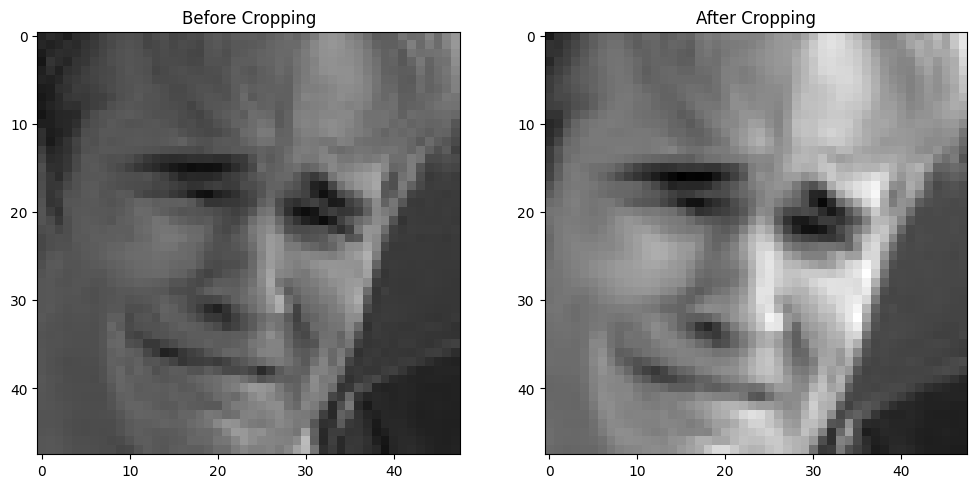

In [ ]:
## 1.16 Showcase of comparisons between original image and randomly cropped image up to 10%

img = cv2.imread(train_img[luckyNumber])

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomResizedCrop(size=(224, 224), scale=(0.8, 0.9), antialias=True), # Resize to 48x48 scalling between 0.8 to 0.9
])

transformedImg = transform(img)

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='grey')
plt.title("Before Cropping")

plt.subplot(1, 2, 2)
plt.imshow(transformedImg.numpy()[0], cmap="grey")
plt.title("After Cropping")

Text(0.5, 1.0, 'After Affine')

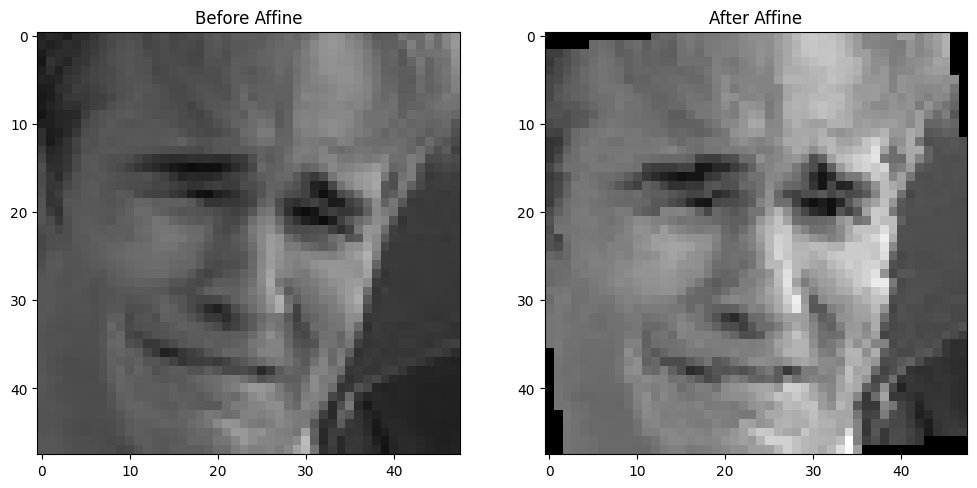

In [ ]:
## 1.17 Showcase of comparisons between original image and scalling image between 80% to 120% and rotating betweeen -25 to 25

img = cv2.imread(train_img[luckyNumber])

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomAffine(degrees=(-20, 20), scale=(0.8, 1.2)), # Random affine transformation the input keeping center invariant.
])

transformedImg = transform(img)

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='grey')
plt.title("Before Affine")

plt.subplot(1, 2, 2)
plt.imshow(transformedImg.numpy()[0], cmap="grey")
plt.title("After Affine")

Text(0.5, 1.0, 'After Brightness Adjustment')

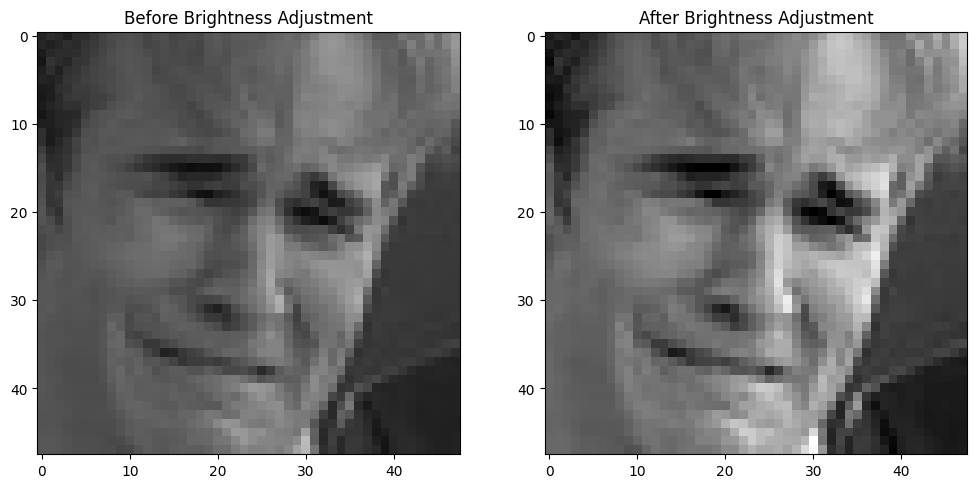

In [ ]:
## 1.18 Showcase of comparisons between original image and brightness adjusted image

img = cv2.imread(train_img[luckyNumber])

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomPhotometricDistort(brightness=(0.8, 1.2)),
])

transformedImg = transform(img)

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='grey')
plt.title("Before Brightness Adjustment")

plt.subplot(1, 2, 2)
plt.imshow(transformedImg.numpy()[0], cmap="grey")
plt.title("After Brightness Adjustment")

Text(0.5, 1.0, 'After Contrast Adjustment')

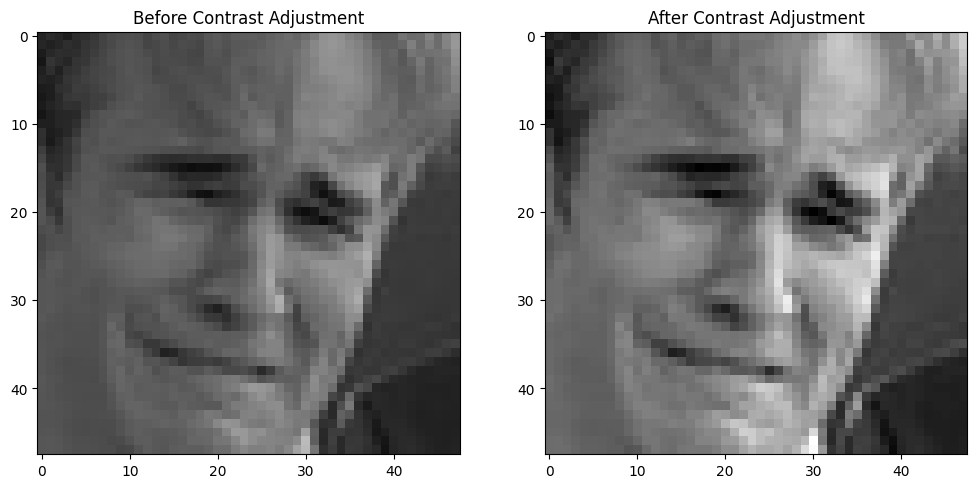

In [ ]:
## 1.19 Showcase of comparisons between original image and contrast adjusted image

img = cv2.imread(train_img[luckyNumber])

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomAutocontrast(p=1.0),
])

transformedImg = transform(img)

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='grey')
plt.title("Before Contrast Adjustment")

plt.subplot(1, 2, 2)
plt.imshow(transformedImg.numpy()[0], cmap="grey")
plt.title("After Contrast Adjustment")

Transformed image type: <class 'torchvision.tv_tensors._image.Image'>
Transformed image size: torch.Size([3, 224, 224])
Transformed image array: 
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


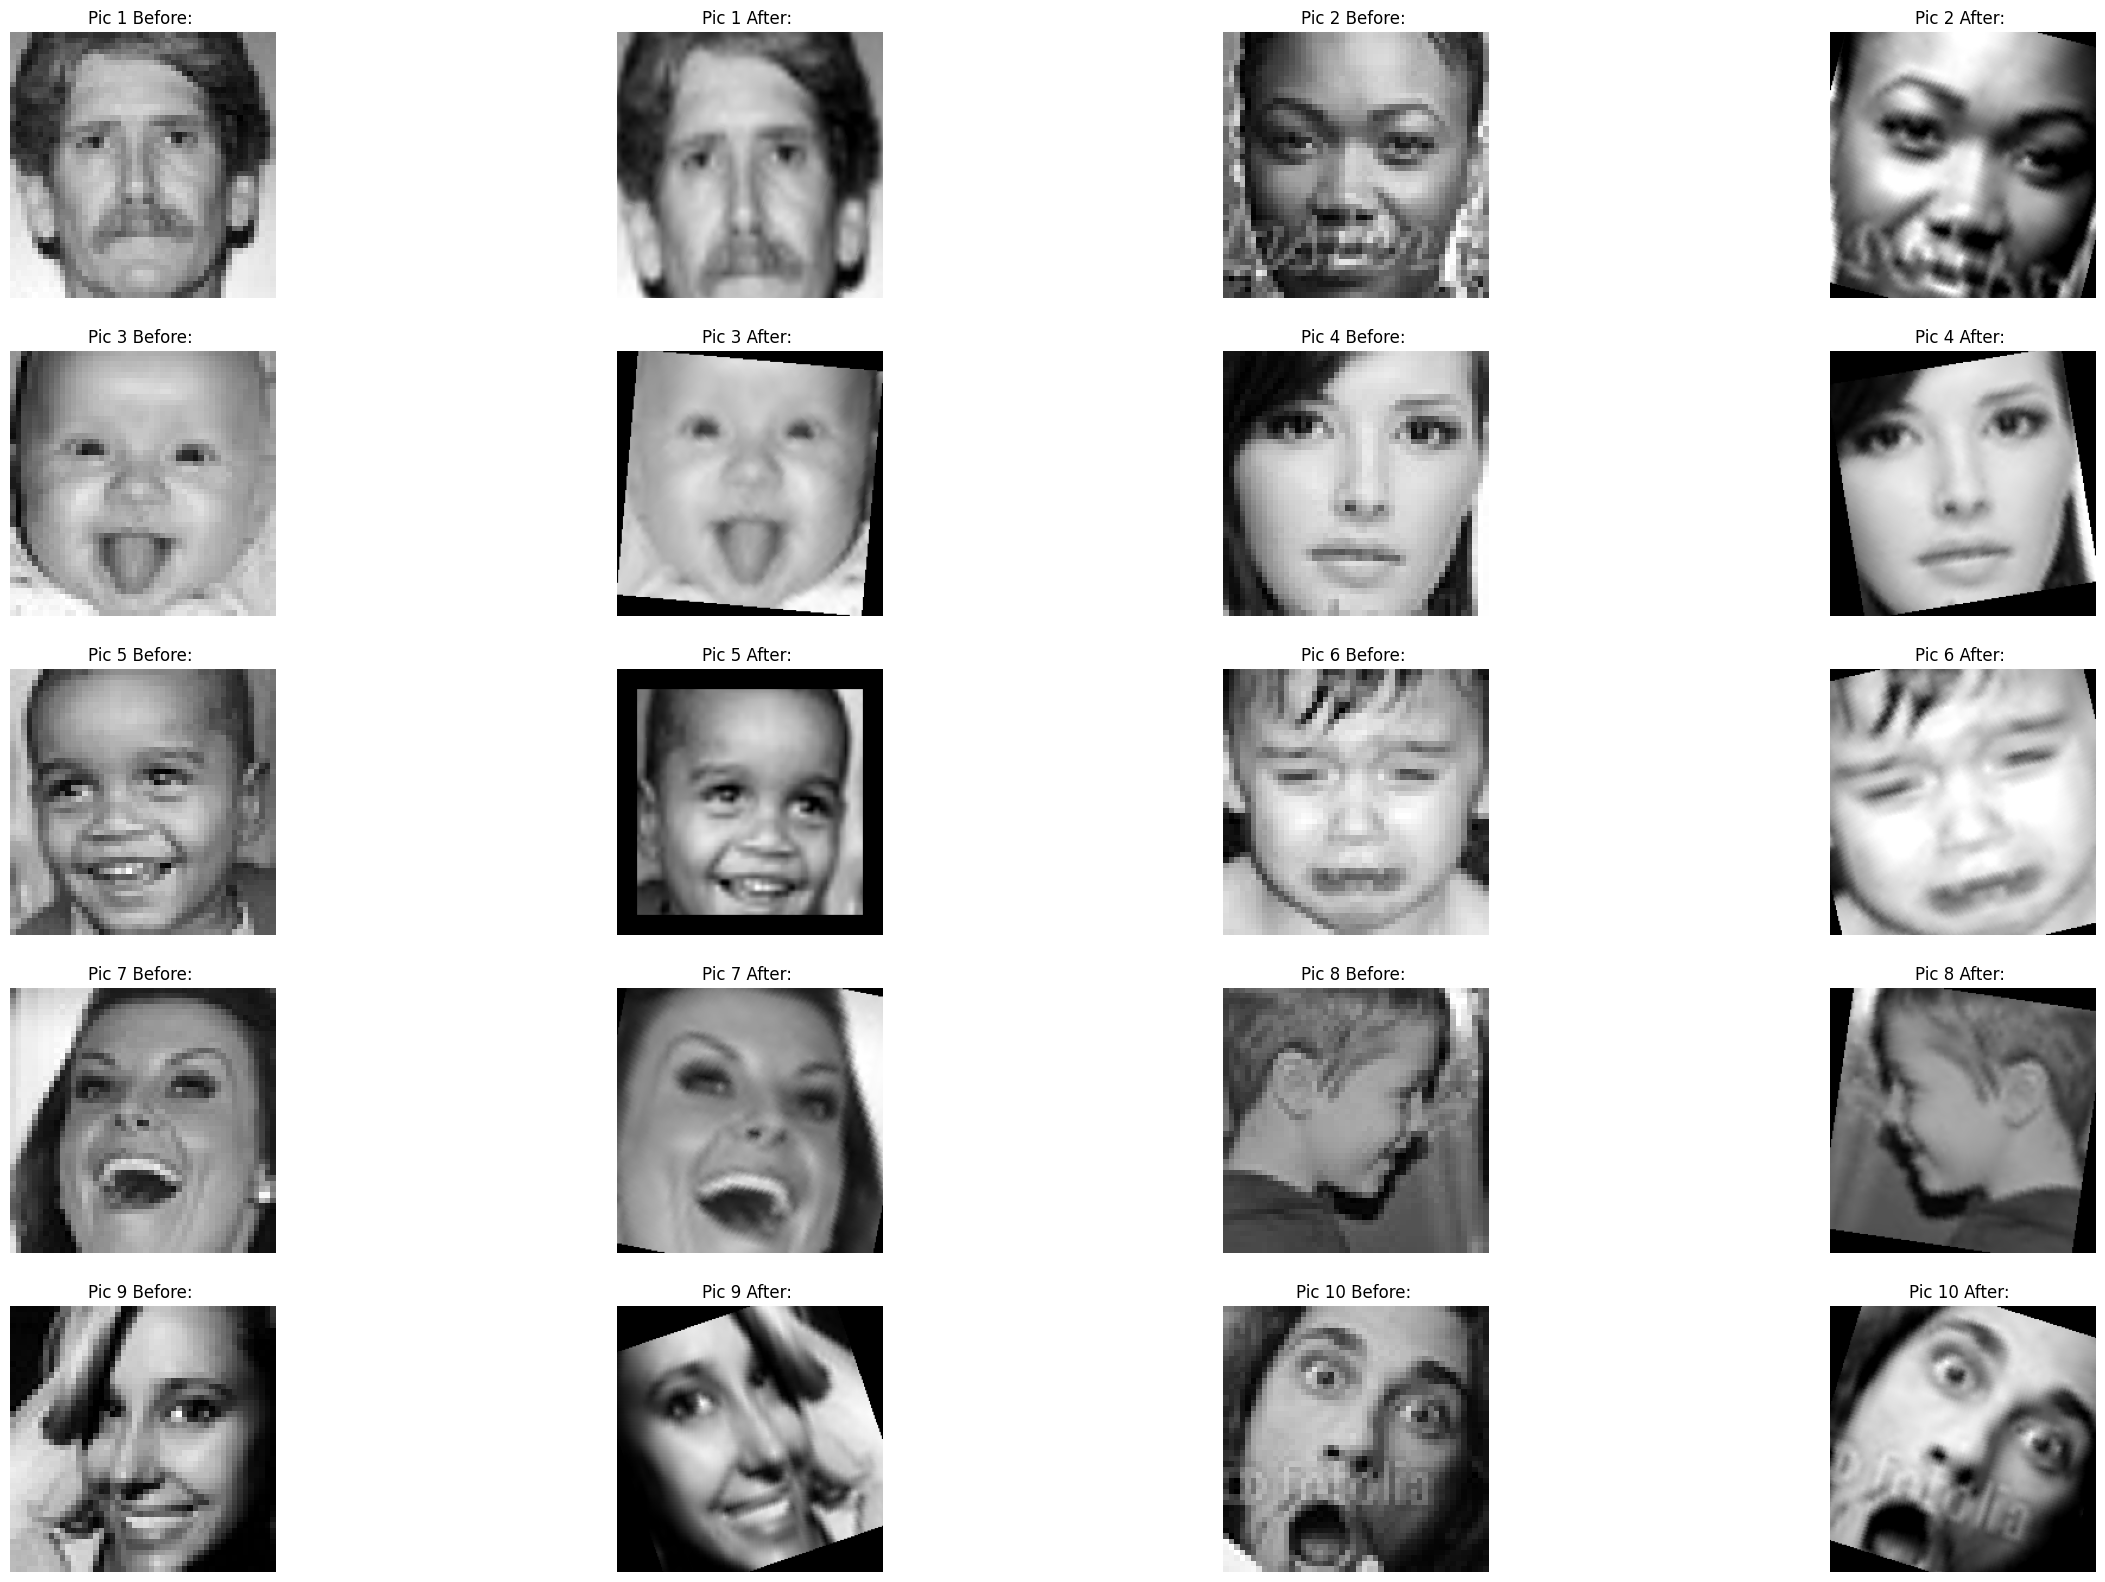

In [49]:
## 1.20 Showcase 10 Transformed Image With Combination of All Transformation 

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.Resize((224, 224)),
    v2.RandomHorizontalFlip(p=0.5), # 100% chance to flip an image
    v2.RandomResizedCrop(size=(224, 224), scale=(0.8, 0.9), antialias=True), # Resize to 48x48 scalling between 0.08 to 0.1
    v2.RandomAffine(degrees=(-20, 20), scale=(0.8, 1.2)), # Random degree rotation of -25 --> +20 while scaling size between 0.8 to 1.2
    v2.RandomPhotometricDistort(brightness=(0.8, 1.2)),
    v2.RandomAutocontrast(p=1.0),
])

images = []

for i in range(0, 10):
    randNum = random.randrange(0, len(train_img))

    originalImg = cv2.imread(train_img[randNum], cv2.IMREAD_GRAYSCALE)
    images.append(originalImg)

    colorImg = cv2.cvtColor(originalImg, cv2.COLOR_GRAY2RGB)

    transformedImg = transform(colorImg)
    images.append(transformedImg)

print(f"Transformed image type: {type(transformedImg)}")
print(f"Transformed image size: {transformedImg.shape}")
print(f"Transformed image array: \n{transformedImg[:1]}")

fig = plt.figure(figsize=(30, 20))

imgNameList = []

for j in range(1, 11):
    imgNameList.append(str(j))
    imgNameList.append(str(j))

for i in range(0, 20):
    plt.subplot(5, 4, i+1)
    
    if (i+1) % 2 == 0:
        plt.imshow(images[i].permute(1, 2, 0))
        imgName = "Pic " + imgNameList[i] + " After: "
    else:
        plt.imshow(images[i], cmap="grey")
        imgName = "Pic " + imgNameList[i] + " Before: "
    
    plt.title(imgName)

    plt.axis('off')

plt.show()


In [50]:
## 1.21 Whole Function for Entire Preprocessing Step

cascadeXMLPath = os.path.join(current_wd, "haarcascade_frontalface_default.xml")

face_cascade = cv2.CascadeClassifier(cascadeXMLPath)

def cropImageOfDetectedFace(img):

    face_rectangle = face_cascade.detectMultiScale(img,
                                                   scaleFactor=1.1, # Image size reduced by 1.1 
                                                   minNeighbors=5) # Amount of detections around the same region to declare it is an object

    for (x, y, w, h) in face_rectangle:

        croppedImg = img[y+1 : y+h, x+1: x+w]

        resizedCroppedImg = cv2.resize(croppedImg, dsize=(224,224))

        return resizedCroppedImg
    
    return img

def dataPreprocessing(img):
    
    detectedFace = cropImageOfDetectedFace(img)

    transform = v2.Compose([
        v2.ToImage(), # Converting to tensor of type float32
        v2.ToDtype(torch.float32, scale=True),
        v2.Resize((224, 224)),
        v2.RandomHorizontalFlip(p=0.5), # 100% chance to flip an image
        v2.RandomResizedCrop(size=(224, 224), scale=(0.8, 0.9), antialias=True), # Resize to 224x224 scalling between 0.08 to 0.1
        v2.RandomAffine(degrees=(-20, 20), scale=(0.8, 1.2)), # Random degree rotation of -25 --> +20 while scaling size between 0.8 to 1.2
        v2.RandomPhotometricDistort(brightness=(0.8, 1.2)),
        v2.RandomAutocontrast(p=1.0),
    ])

    transformedImgNew = transform(detectedFace)

    return transformedImgNew

Original greyscale image data type: <class 'numpy.ndarray'>
Original greyscale image shape: (48, 48)
Transfomed image type: <class 'torchvision.tv_tensors._image.Image'>
Transformed image shape: torch.Size([3, 224, 224])


Text(0.5, 1.0, 'After Preprocess')

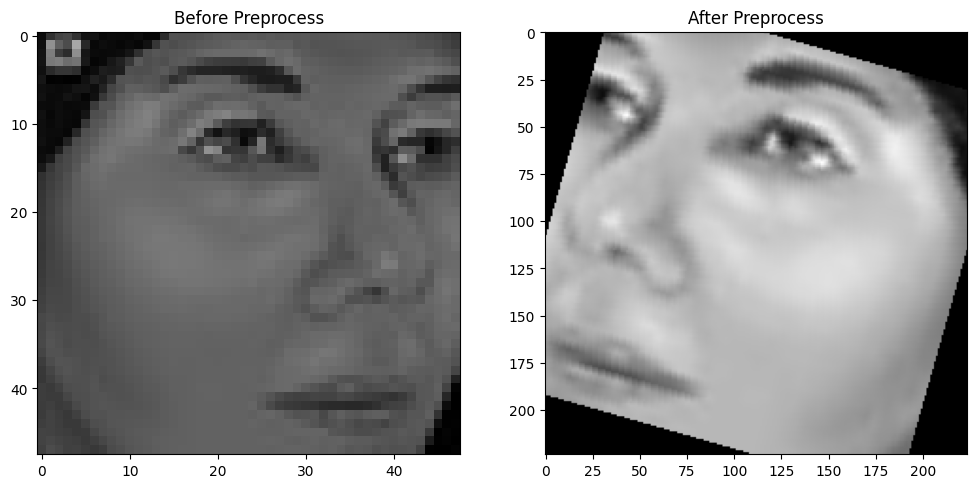

In [51]:
## 1.22 Testing for Whole Preprocess Image for The Dataset

testImgAdd = train_img[luckyNumber]
testImg = cv2.imread(testImgAdd, cv2.IMREAD_GRAYSCALE)

print(f"Original greyscale image data type: {type(testImg)}")
print(f"Original greyscale image shape: {testImg.shape}")

testImg = cv2.cvtColor(testImg, cv2.COLOR_GRAY2RGB)

transformed = dataPreprocessing(testImg)
print(f"Transfomed image type: {type(transformed)}")
print(f"Transformed image shape: {transformed.shape}")

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(testImg, cmap="grey")
plt.title("Before Preprocess")

plt.subplot(1, 2, 2)
plt.imshow(transformed.permute(1, 2, 0))
plt.title("After Preprocess")

Image shape: (48, 48)
Image ::
 [[ 11  49  67  72  49  18  19   8  11  10   9  13   6   6  45  82  81  81
   83  87  91  92  90  88  90  87  90  87  88  87  88  86  87  88  89  90
   91  90  89  89  86  85  82  78  75  71  64  57]
 [ 15 145  95  76 167  39   8  13  10   7  11   7  17  54  81  77  82  85
   89  91  93  96  99 101  99  98  94  95  95  86  88  83  84  84  85  86
   87  87  88  89  89  88  86  80  79  76  69  61]
 [ 19 125  60  44 142  21  10   9  10  12  21  48  79  86  83  87  89  93
  100 104 106 106 106 106 107 113 108 102 105  95  90  87  85  84  83  84
   85  86  88  90  92  89  90  90  91  81  76  71]
 [ 20 121 126 109 115  24   5   9  23  33  55  89  78  82  79  88  91  85
   74  65  61  60  59  57  63  65  90 103 110 105  94  93  90  88  87  86
   87  89  92  94  95  97 101  98 101  96  90  79]
 [ 16  42  53  53  46   6  13  30  27  30  80  78  79  84  90  79  55  44
   36  36  36  33  31  32  29  29  32  45  87 107  99  97  94  92  91  91
   91  93  95  97  99 10

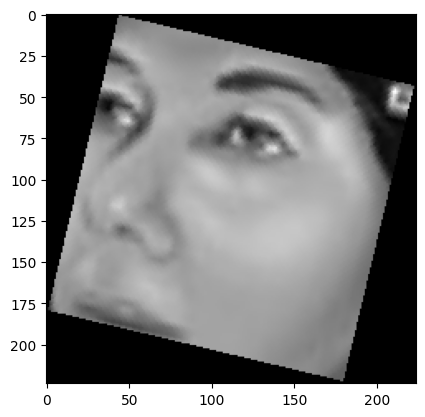

In [55]:
## 1.23 Testing for image saving mechanism

imgPath = train_img[luckyNumber]

img = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)

print(f"Image shape: {img.shape}")
print(f"Image ::\n {img[:5]}")

img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
processedImg = dataPreprocessing(img)

processedImg = processedImg.permute(1, 2, 0) # Permute to (H x W x C)
processedImg = processedImg.numpy() # Convert tensor to numpy float

print(f"1. Shape: {processedImg.shape}")
print(f"1. Array: {processedImg[:5]}")

# Conversion from numpy float to uint8 [0-255]
if processedImg.dtype != np.uint8:
    processedImg = (processedImg * 255).astype(np.uint8)

print(f"New processedImg size: {processedImg.shape}")
print(f"New processedImg type: {type(processedImg)} and variable type: {processedImg.dtype}")
print(f"New processedImg array: {processedImg[:1]}")

plt.imshow(processedImg)

processedImg = Image.fromarray(processedImg) # Take first row only

processedImg = processedImg.convert("L")

processedImg.show()

In [ ]:
## 1.24 Preprocess and Save Images into Dataset

def datasetProcessing(directory, folderName):

    processedDataFoldername = os.path.join(current_wd, "processed_data")

    if not(os.path.isdir(processedDataFoldername)):
        os.mkdir(processedDataFoldername)
    
    trainOrTestFoldername = os.path.join(processedDataFoldername, folderName)
    
    if not(os.path.isdir(trainOrTestFoldername)):
        os.mkdir(trainOrTestFoldername)
    
    counter = 1

    for emotion in os.listdir(directory):
        emotionFolderDir = os.path.join(directory, emotion)

        newEmotionFolderDir = os.path.join(trainOrTestFoldername, emotion)

        if not(os.path.isdir(newEmotionFolderDir)):
            os.mkdir(newEmotionFolderDir)
        
        for filename in os.listdir(emotionFolderDir):
            imgPath = os.path.join(emotionFolderDir, filename)
            
            img = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)

            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

            processedImg = dataPreprocessing(img)

            processedImg = processedImg.permute(1, 2, 0)

            processedImg = processedImg.numpy() # Take first row only

            if processedImg.dtype != np.uint8:
                processedImg = (processedImg * 255).astype(np.uint8)

            processedImg = Image.fromarray(processedImg) 

            processedImg = processedImg.convert("L") # Convert image from float-format to single-channel greyscale format

            newFilename = str(counter) + ".png"

            processedImgPath = os.path.join(newEmotionFolderDir, newFilename)

            processedImg.save(processedImgPath)

            counter += 1
        
        print(f"\nThe {folderName} -> '{emotion}' images has been processed and saved")

existingPath = os.path.join(current_wd, "processed_data", "train", "disgust", "1.png")

if not(os.path.isdir(existingPath)):
    datasetProcessing(train_directory, "train")

    print("\nThe training dataset has been processed and saved.\n")

    datasetProcessing(test_directory, "test")

    print("\nThe testing dataset has been processed and saved.\n")

else:
    print("The dataset has been preprocessed before.\n Please check the repository")


The train -> 'angry' images has been processed and saved

The train -> 'disgust' images has been processed and saved

The train -> 'fear' images has been processed and saved

The train -> 'happy' images has been processed and saved

The train -> 'neutral' images has been processed and saved

The train -> 'sad' images has been processed and saved

The train -> 'surprise' images has been processed and saved

The training dataset has been processed and saved.


The test -> 'angry' images has been processed and saved

The test -> 'disgust' images has been processed and saved

The test -> 'fear' images has been processed and saved

The test -> 'happy' images has been processed and saved

The test -> 'neutral' images has been processed and saved

The test -> 'sad' images has been processed and saved

The test -> 'surprise' images has been processed and saved

The testing dataset has been processed and saved.

